# Importing the libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Getting and Loading the Training and Validation set

In [2]:
train_path = r"C:\American_Sign_Language_Character_Classification_Using_CNN\dataset\train"
validation_path = r"C:\American_Sign_Language_Character_Classification_Using_CNN\dataset\val"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40.,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (100, 100),
                                                batch_size = 32,
                                                class_mode = "categorical")

validation_set = validation_datagen.flow_from_directory(validation_path,
                                                       target_size = (100, 100),
                                                       batch_size = 32,
                                                       class_mode = "categorical")

Found 3966 images belonging to 24 classes.
Found 985 images belonging to 24 classes.


# Building the CNN

## Initalizing the CNN

In [5]:
model = Sequential()

## Adding the Layers

### Adding the First Convolutional and Pooling layer

In [6]:
model.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Second Convolutional and Pooling layer

In [7]:
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Third Convolutional and Pooling layer

In [8]:
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Forth Convolutional and Pooling layer

In [9]:
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Adding the Fifth Convolutional and Pooling layer

In [10]:
model.add(Conv2D(256, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

### Flattening all the layers

In [11]:
model.add(Flatten())

### Adding the First Fully Connected Layer

In [12]:
model.add(Dense(units = 128, activation = "relu"))

### Adding the Second Fully Connected and Dropout Layer

In [13]:
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.1))

### Adding the Final Fully Connected Layer

In [14]:
model.add(Dense(units = 24, activation = "softmax"))

## Compiling the CNN

In [15]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Showing the model summary

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

# Training the CNN

In [17]:
# Saving the best model only
checkpoint = ModelCheckpoint(filepath = "model.h5",
                            monitor = "val_loss",
                            save_best_only = True, 
                            verbose = 1)

In [18]:
"""early_stopping = EarlyStopping(monitor = "val_loss",
                              patience = 10,
                              verbose = 1,
                              restore_best_weights = True)
                              """

'early_stopping = EarlyStopping(monitor = "val_loss",\n                              patience = 10,\n                              verbose = 1,\n                              restore_best_weights = True)\n                              '

## Calculating the steps_per_epoch and validation_steps

In [19]:
import math

batch_size = 32
training_size = 3966  
validation_size = 985

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

In [20]:
history = model.fit_generator(training_set,
                             steps_per_epoch = steps_per_epoch,
                             epochs = 30,
                             validation_data = validation_set,
                             validation_steps = validation_steps,
                             callbacks = [checkpoint], 
                             shuffle = True)

Epoch 1/30
124/124 [==============================] - 57s 463ms/step - loss: 2.9263 - accuracy: 0.0850 - val_loss: 2.4416 - val_accuracy: 0.1421

Epoch 00001: val_loss improved from inf to 2.44159, saving model to model.h5
Epoch 2/30
124/124 [==============================] - 51s 411ms/step - loss: 2.2769 - accuracy: 0.2110 - val_loss: 1.8468 - val_accuracy: 0.2457

Epoch 00002: val_loss improved from 2.44159 to 1.84684, saving model to model.h5
Epoch 3/30
124/124 [==============================] - 51s 413ms/step - loss: 1.7672 - accuracy: 0.3626 - val_loss: 1.5013 - val_accuracy: 0.6183

Epoch 00003: val_loss improved from 1.84684 to 1.50128, saving model to model.h5
Epoch 4/30
124/124 [==============================] - 51s 409ms/step - loss: 1.2898 - accuracy: 0.5285 - val_loss: 1.3469 - val_accuracy: 0.5594

Epoch 00004: val_loss improved from 1.50128 to 1.34694, saving model to model.h5
Epoch 5/30
124/124 [==============================] - 55s 443ms/step - loss: 1.0500 - accuracy: 

# Saving the model

In [21]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

# Vsiualizing the training performance

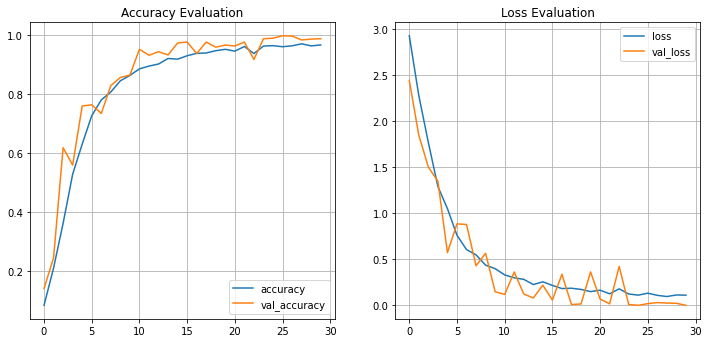

In [22]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("model_history.jpg")